In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/GlobalLandTemperaturesByCountry.csv')

In [4]:
df.drop(columns = {'AverageTemperatureUncertainty'}, inplace= True)
df.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544811 entries, 0 to 577460
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dt                  544811 non-null  object 
 1   AverageTemperature  544811 non-null  float64
 2   Country             544811 non-null  object 
dtypes: float64(1), object(2)
memory usage: 16.6+ MB


In [17]:
df['dt'] = pd.to_datetime(df['dt'])

In [23]:
df['dt'] = df['dt'].dt.year

In [24]:
df.head()

,dt,AverageTemperature,Country
0,1743,4.384,Åland
5,1744,1.530,Åland
6,1744,6.702,Åland
7,1744,11.609,Åland
8,1744,15.342,Åland


## Brazil's average temperature along the years

In [45]:
df_brazil = df[df['Country'] == 'Brazil'].groupby('dt')['AverageTemperature']\
                             .agg('mean')

In [58]:
df_brazil = pd.DataFrame(df_brazil)

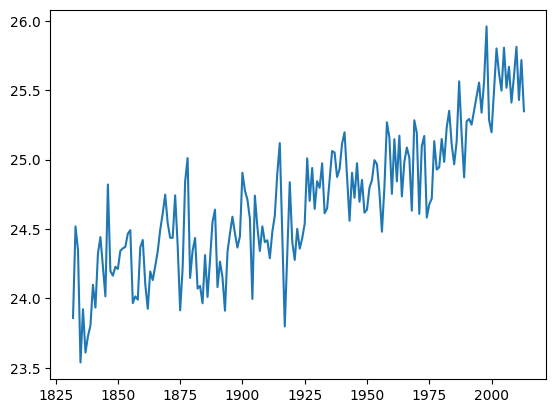

In [72]:
plt.plot(df_brazil.index, df_brazil.AverageTemperature)

In [75]:
moving_avg_br = df_brazil.copy()

In [79]:
# ten year moving average
moving_avg_br['MA_temp'] = moving_avg_br['AverageTemperature'].rolling(10).mean()

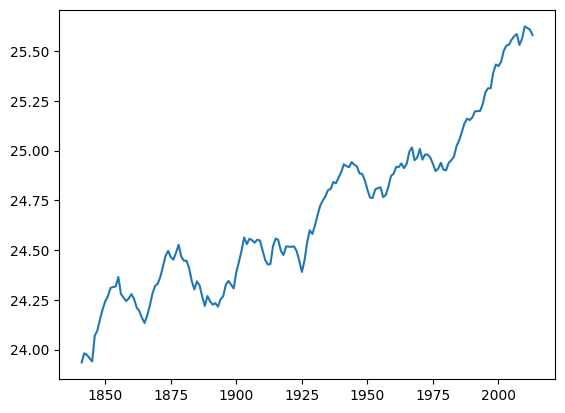

In [80]:
plt.plot(moving_avg_br.index, moving_avg_br.MA_temp)

## World average temperature along the years

In [46]:
df_world = df.groupby('dt')['AverageTemperature'].agg('mean')

In [73]:
df_world = pd.DataFrame(df_world)

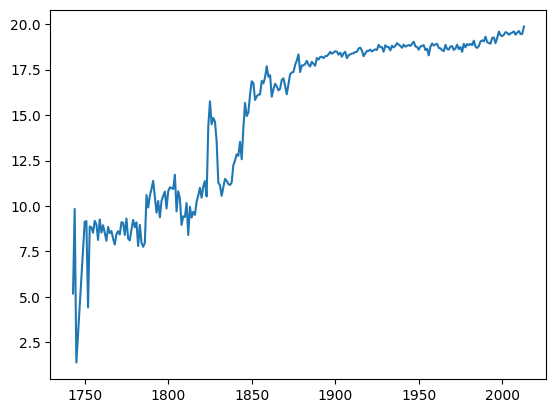

In [74]:
plt.plot(df_world.index, df_world.AverageTemperature)

In [81]:
moving_avg_w = df_world.copy()

# ten year moving average
moving_avg_w['MA_temp'] = moving_avg_w['AverageTemperature'].rolling(10).mean()

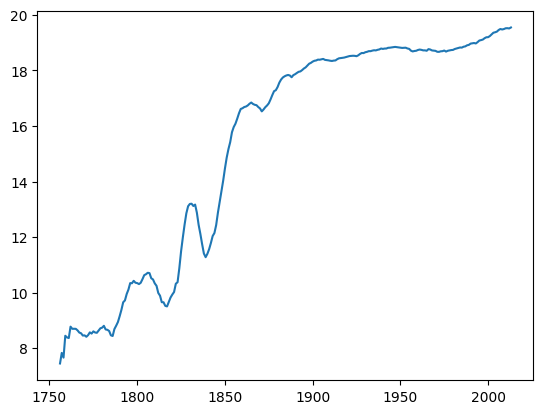

In [82]:
plt.plot(moving_avg_w.index, moving_avg_w.MA_temp)